# Objective

**Understand how funding differs across similarly rural areas**
- We will not continue trying to identify bias in which areas recieve funding based upon the business case for providing broadband there.
- Now we just look for an understanding of similarly rural areas, and the funding situations in those specific areas
- As we saw in the past analysis, areas recieving funding where there is less than 100 housholds per mile are simply artifacts of areas with tiny land area, but in reality are quite rural. We will only consider areas in the bottom 80% of density (<110 housing units/mile)

    
    
# Contents
- Income across similarly rural areas (repeat)
- 2016 broadband across similarly rural areas
    - Any broadband
    - <4/1, 4/1 - 10/1, 10/1 - 25/3, 25/3+ 
- 2017 Funding across similarly rural areas
    - Percent that gets funding
    - Percent that gets funding (of blocks that previously had funding, but were <10/1)
    - Percent that gets funding (of blocks that didn't have any previous funding)
    - Those who get funding, what was previous speed
    
    
    


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [95]:
df_block = pd.read_csv('block_fund_exploration.csv')

In [96]:
df_block.head()

,Unnamed: 0,block_code,block_group_code,total_length,land_area,population_2016,household_2016,non_0_pop_block,urban_rural,fund_max_up,fund_max_down,max_up,max_down,fund_count,median_household_income_2016,broadband_access,population_per_sq_mile,housing_unit_per_mile
0,0,10010208012007,10010208012,2508.435796,156151.0,4,2.0,1,R,0,0,0.0,0.0,0,77778.0,0,66.346037,1.282871
1,1,10010208012015,10010208012,3012.143871,1861126.0,7,2.0,1,R,0,0,0.0,0.0,0,77778.0,0,9.741415,1.068342
2,2,10010208021005,10010208021,878.975314,36987.0,24,9.0,1,R,0,0,0.0,0.0,0,45750.0,0,1680.590478,16.474865
3,3,10010208021044,10010208021,1773.988513,327365.0,20,6.0,1,R,0,0,0.0,0.0,0,45750.0,0,158.233165,6.348970
4,4,10010209002008,10010209002,8034.608625,2212771.0,14,6.0,1,R,0,0,0.0,0.0,0,52917.0,0,16.386693,1.602069


In [97]:
df_block.block_code = df_block.block_code.astype(str)

In [98]:
# only need blocks with a single (or more ) households and income
df_block = df_block[(df_block.housing_unit_per_mile > 0) & (df_block.median_household_income_2016 > 0)]

In [99]:
len(df_block)

6042562

In [113]:
len(df_block[df_block.fund_count > 0])

137458

In [115]:
137458/6042562

0.022748297824664438

In [6]:
bins_percentile = [0,10,20,30,40,50,60,70,80,90,95,99,99.5,100]
bins = []
for i in tqdm(bins_percentile):
    bins.append(np.percentile(df_block.housing_unit_per_mile.values, i))

100%|██████████| 14/14 [00:01<00:00,  7.88it/s]


## Income across similarly rural areas

In [11]:
val_range = []
data = []
for i in tqdm(range(len(bins)-1)):
    temp = df_block[(df_block.housing_unit_per_mile >= bins[i]) &
                    (df_block.housing_unit_per_mile < bins[i+1]) &
                    (df_block.median_household_income_2016 > 0)]
    
    data.append(list(temp.median_household_income_2016.dropna().values))
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])

100%|██████████| 13/13 [00:03<00:00,  3.45it/s]


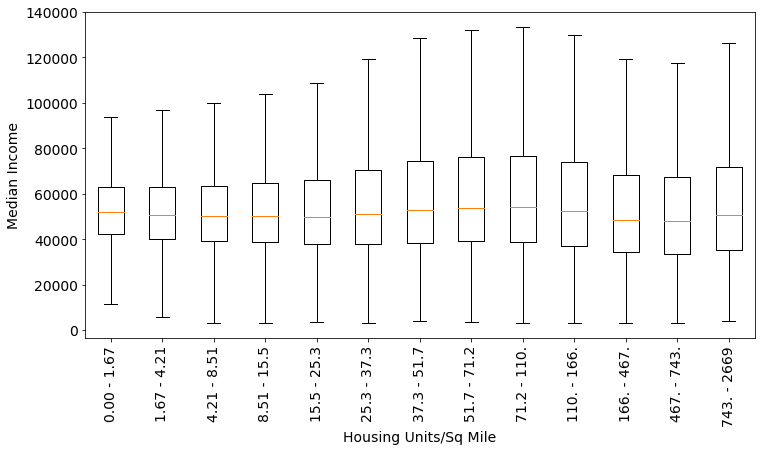

In [12]:
plt.figure(figsize = (12,6))
plt.boxplot(data, sym='')
plt.xlabel('Housing Units/Sq Mile', fontsize=14)
plt.ylabel('Median Income', fontsize=14)
plt.xticks(range(1,14), val_range, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Broadband Access Across Similarly Rural Areas
**Fraction to have broadband**

In [116]:
val_range = []
data = []
for i in tqdm(range(len(bins)-1)):
    temp = df_block[(df_block.housing_unit_per_mile >= bins[i]) &
                    (df_block.housing_unit_per_mile < bins[i+1]) &
                    (df_block.median_household_income_2016 > 0)]
    
    data.append(len(temp[temp.broadband_access == 1])/len(temp))
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])

100%|██████████| 13/13 [00:13<00:00,  1.05s/it]


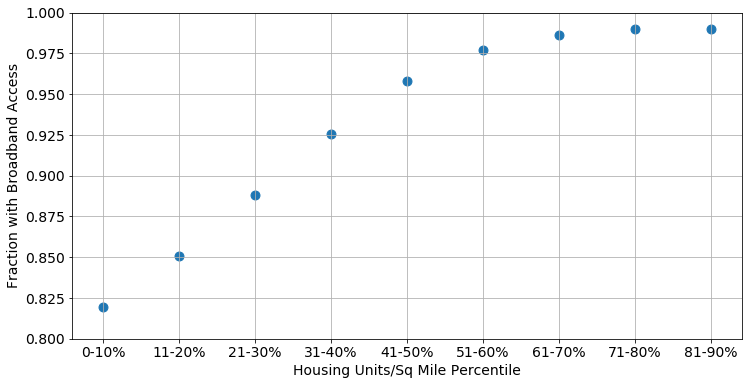

In [130]:
plt.figure(figsize = (12,6))
plt.grid()

plt.scatter(range(0,9), data[0:9],s=80)
plt.xlabel('Housing Units/Sq Mile Percentile', fontsize=14)
plt.ylabel('Fraction with Broadband Access', fontsize=14)
percentile = ['0-10%',
             '11-20%',
             '21-30%',
             '31-40%',
             '41-50%',
              '51-60%',
             '61-70%',
             '71-80%',
             '81-90%']
plt.xticks(range(9), percentile, fontsize=14)
plt.ylim(0.8,1)

#plt.xlim(0,10.9)
plt.yticks(fontsize=14)
plt.show()

**Split by speed**

In [190]:
val_range = []
data_none = []
data_less_4 = []
data_4_to_10 = []
data_10_to_25 = []
data_greater_25 = []


for i in tqdm(range(len(bins)-1)):
    temp = df_block[(df_block.housing_unit_per_mile >= bins[i]) &
                    (df_block.housing_unit_per_mile < bins[i+1])]
    
    data_none.append(len(temp[temp.max_down == 0])/len(temp))
    
    data_less_4.append(len(temp[(temp.max_down < 4) &(temp.max_down > 0)])/len(temp))
    
    data_4_to_10.append(len(temp[(temp.max_down >= 4) & (temp.max_down < 10)])/len(temp))
    
    data_10_to_25.append(len(temp[(temp.max_down >= 10) & (temp.max_down < 25)])/len(temp))
    
    data_greater_25.append(len(temp[(temp.max_down >= 25)])/len(temp))
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])
    

100%|██████████| 13/13 [00:05<00:00,  2.49it/s]


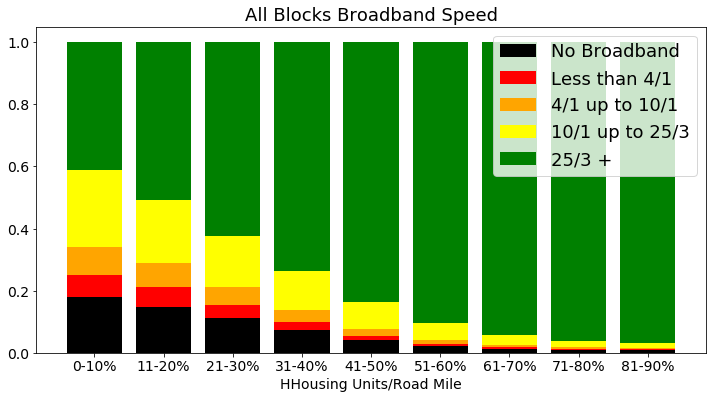

In [191]:
plt.figure(figsize = (12,6))

for i in range(9):
    bottom = 0
    plt.bar(i, data_none[i], bottom=bottom, color='black',label= 'No Broadband')
    bottom += data_none[i]
    plt.bar(i, data_less_4[i], bottom=bottom, color='red',label= 'Less than 4/1')
    bottom += data_less_4[i]
    plt.bar(i, data_4_to_10[i], bottom =bottom, color='orange',label= '4/1 up to 10/1' )
    bottom += data_4_to_10[i]
    plt.bar(i, data_10_to_25[i], bottom =bottom, color='yellow',label= '10/1 up to 25/3' )
    bottom += data_10_to_25[i]
    plt.bar(i, data_greater_25[i], bottom =bottom, color='green',label= '25/3 +'  )
    if i == 0:
        plt.legend(loc='upper right',fontsize=18)
    

plt.xlabel('HHousing Units/Road Mile', fontsize=14)
plt.title('All Blocks Broadband Speed', fontsize=18)
#plt.xticks(range(9), val_range[:9], rotation=90, fontsize=14)
percentile = ['0-10%',
             '11-20%',
             '21-30%',
             '31-40%',
             '41-50%',
              '51-60%',
             '61-70%',
             '71-80%',
             '81-90%']
plt.xticks(range(9), percentile, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Funding Across Similarly Rural Areas

**fraction of all blocks to get funding**

In [155]:
val_range = []
data = []
for i in tqdm(range(len(bins)-1)):
    temp = df_block[(df_block.housing_unit_per_mile >= bins[i]) &
                    (df_block.housing_unit_per_mile < bins[i+1])]
    
    data.append(len(temp[temp.fund_count > 0])/len(temp))
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])

100%|██████████| 13/13 [00:02<00:00,  6.50it/s]


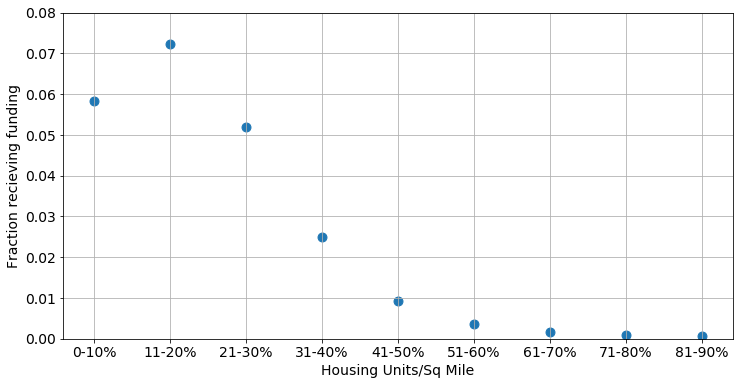

In [156]:
plt.figure(figsize = (12,6))
plt.grid()
plt.scatter(range(0,9), data[0:9],s=80)
plt.xlabel('Housing Units/Sq Mile', fontsize=14)
plt.ylabel('Fraction recieving funding', fontsize=14)
#plt.xticks(range(9), val_range[:9], rotation=90, fontsize=14)
percentile = ['0-10%',
             '11-20%',
             '21-30%',
             '31-40%',
             '41-50%',
              '51-60%',
             '61-70%',
             '71-80%',
             '81-90%']
plt.xticks(range(9), percentile, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,0.08)
plt.show()

**split on having previous broadband access**

In [185]:
val_range = []
data_ = []

val_range = []
data_no_broadband = []
data_less_4 = []
data_4_to_10 = []
data_10_to_25 = []
data_greater_25 = []

for i in tqdm(range(len(bins)-1)):
    temp = df_block[(df_block.housing_unit_per_mile >= bins[i]) &
                    (df_block.housing_unit_per_mile < bins[i+1]) &
                    (df_block.fund_count > 0)]
    
    data_no_broadband.append(len(temp[temp.max_down == 0])/len(temp))
    data_less_4.append(len(temp[(temp.max_down < 4) &(temp.max_down > 0)])/len(temp))
    
    data_4_to_10.append(len(temp[(temp.max_down >= 4) & (temp.max_down < 10)])/len(temp))
    
    data_10_to_25.append(len(temp[(temp.max_down >= 10) & (temp.max_down < 25)])/len(temp))
    
    data_greater_25.append(len(temp[(temp.max_down >= 25)])/len(temp))
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])
    

100%|██████████| 13/13 [00:01<00:00,  7.71it/s]


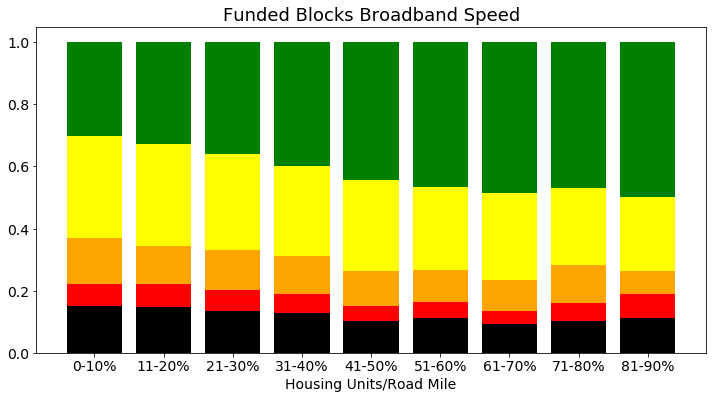

In [186]:
plt.figure(figsize = (12,6))

for i in range(9):
    bottom = 0
    plt.bar(i, data_no_broadband[i], bottom=bottom, color='black',label= 'No Broadband')
    bottom += data_no_broadband[i]
    plt.bar(i, data_less_4[i], bottom=bottom, color='red',label= 'Less than 4/1')
    bottom += data_less_4[i]
    plt.bar(i, data_4_to_10[i], bottom =bottom, color='orange',label= '4/1 up to <10/1' )
    bottom += data_4_to_10[i]
    plt.bar(i, data_10_to_25[i], bottom =bottom, color='yellow',label= '10/1 up to <25/3' )
    bottom += data_10_to_25[i]
    plt.bar(i, data_greater_25[i], bottom =bottom, color='green',label= '25/3 +'  )
    if i == 0:
        pass
        #plt.legend(loc='upper right',fontsize=18)
    

plt.xlabel('Housing Units/Road Mile', fontsize=14)
plt.title('Funded Blocks Broadband Speed', fontsize=18)
percentile = ['0-10%',
             '11-20%',
             '21-30%',
             '31-40%',
             '41-50%',
              '51-60%',
             '61-70%',
             '71-80%',
             '81-90%']
plt.xticks(range(9), percentile, fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0,0.08)
plt.show()

**split on funding speed**

In [193]:
val_range = []
data_ = []

val_range = []
data_less_4 = []
data_4_to_10 = []
data_10_to_25 = []
data_greater_25 = []

for i in tqdm(range(len(bins)-1)):
    temp = df_block[(df_block.housing_unit_per_mile >= bins[i]) &
                    (df_block.housing_unit_per_mile < bins[i+1]) &
                    (df_block.fund_count > 0)]
    
    data_less_4.append(len(temp[(temp.fund_max_down < 4) &(temp.fund_max_down > 0)])/len(temp))
    
    data_4_to_10.append(len(temp[(temp.fund_max_down >= 4) & (temp.fund_max_down < 10)])/len(temp))
    
    data_10_to_25.append(len(temp[(temp.fund_max_down >= 10) & (temp.fund_max_down < 25)])/len(temp))
    
    data_greater_25.append(len(temp[(temp.fund_max_down >= 25)])/len(temp))
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])
    
    

100%|██████████| 13/13 [00:00<00:00, 16.21it/s]


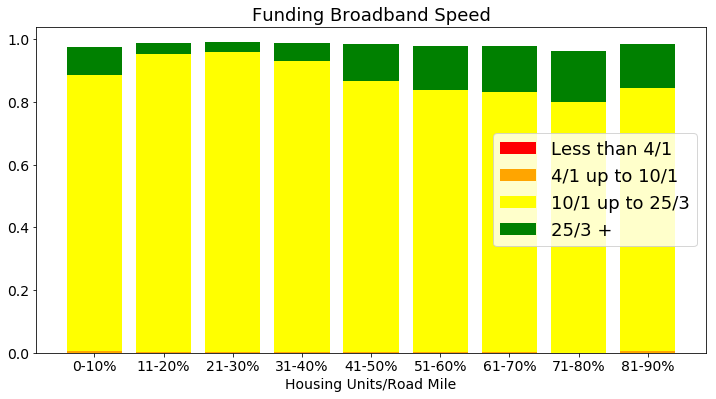

In [194]:
plt.figure(figsize = (12,6))

for i in range(9):
    bottom = 0
    plt.bar(i, data_less_4[i], bottom=bottom, color='red',label= 'Less than 4/1')
    bottom += data_less_4[i]
    plt.bar(i, data_4_to_10[i], bottom =bottom, color='orange',label= '4/1 up to 10/1' )
    bottom += data_4_to_10[i]
    plt.bar(i, data_10_to_25[i], bottom =bottom, color='yellow',label= '10/1 up to 25/3' )
    bottom += data_10_to_25[i]
    plt.bar(i, data_greater_25[i], bottom =bottom, color='green',label= '25/3 +'  )
    if i == 0:
        plt.legend(loc='center right',fontsize=18)
    

#plt.ylabel('Funded Broadway Speed', fontsize=14)
plt.yticks(fontsize=14)



plt.xlabel('Housing Units/Road Mile', fontsize=14)
plt.title('Funding Broadband Speed', fontsize=18)
percentile = ['0-10%',
             '11-20%',
             '21-30%',
             '31-40%',
             '41-50%',
              '51-60%',
             '61-70%',
             '71-80%',
             '81-90%']
plt.xticks(range(9), percentile, fontsize=14)
plt.yticks(fontsize=14)
plt.show()